# Thông tin sinh viên
- Họ và tên: Nguyễn Thị Như Vân

# LeNet CNN 

In [86]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model, Model
import tensorflow as tf
import keras

class LeNetCNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)

    flat = Flatten()(S4)
    # These like ANN
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    adam = keras.optimizers.Adam(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  

  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)



# LeNet CNN removed all activations

In [44]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Add, AveragePooling2D
from keras.models import load_model, Model
#from keras.objectives import categorical_crossentropy

class LeNet_1st:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    
    C1 = Conv2D(8, (3, 3), padding='same')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)

    C3 = Conv2D(8, (3, 3), padding='same')(S2)
    C4 = Conv2D(8, (3, 3), padding='same')(C3)
    C5 = Add()([C4, S2])

    C6 = Conv2D(16, (3, 3), strides = (2,2), padding='same')(C5)
    C7 = Conv2D(16, (3, 3), padding='same')(C6)
    C8 = Conv2D(16, (3, 3), padding='same')(C7)
    C9 = Add()([C8, C6])

    P10 = AveragePooling2D()(C9)
    flat = Flatten()(P10)
    F0 = Dense(400, use_bias=True)(flat)
    output = Dense(10, activation='softmax', use_bias=True)(F0)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=['accuracy'])
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truthewedsdAQ  a QA
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

# LeNet CNN removed Convolutional Layer

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model, Model
import tensorflow as tf
import keras

class LeNet_2nd:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)

    flat = Flatten()(S4)
    # These like ANN
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    adam = keras.optimizers.Adam(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  

  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

In [91]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [92]:
from collections import Counter

In [93]:
counter = Counter(y_train).most_common(3)

In [94]:
counter

[(1, 6742), (7, 6265), (3, 6131)]

In [95]:
import numpy as np

def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    oh[i, int(y[i])]=1
  return oh

In [96]:
import numpy as np
def norm_zero_one(x_train):
  min_val = np.min(x_train)
  max_val = np.max(x_train)
  x_train_norm = (x_train-min_val)/(max_val-min_val)
  return x_train_norm

def norm_normal_dist(x_train):
  mean_val = np.mean(x_train)
  std_val = np.std(x_train)
  x_train_norm = (x_train-mean_val)/std_val
  return x_train_norm

In [97]:
from sklearn import preprocessing
import numpy as np

#enc = preprocessing.OneHotEncoder()

#enc.fit(y_train)

#y_train_oh = enc.transform(y_train).toarray()
#y_train_oh.shape
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

#x_train_norm = x_train_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1
#x_test_norm = x_test_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1

In [98]:
x_train_norm.shape

(60000, 28, 28)

# Training and evaluating on original LeNet

In [99]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

In [100]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [102]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1024)              0         
                                                                 
 dense_22 (Dense)            (None, 1024)             

In [104]:
history = model.fit(x=x_train,y=y_train, epochs=10 , batch_size = 128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.2236 - accuracy: 0.9281
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0977 - accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0677 - accuracy: 0.9811
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0617 - accuracy: 0.9843
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0669 - accuracy: 0.9837
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0812 - accuracy: 0.9825
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1269 - accuracy: 0.9779
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1159 - accuracy: 0.9796
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1641 - accuracy: 0.9771
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1291 - accuracy: 0.9811

In [105]:
test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print(" mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

 mean squared error (MSE) for the test data set is: [0.1680215448141098, 0.9782000184059143]


In [112]:
model.save("bien-chung-lenet.h5")

In [106]:
model.save("trained_model.h5")

Text(0, 0.5, 'Loss')

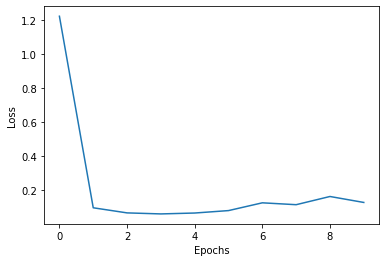

In [108]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

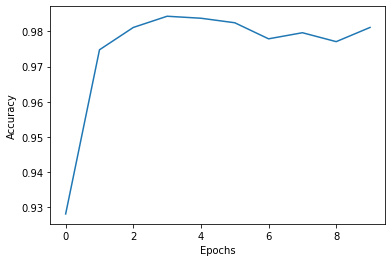

In [107]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [110]:
cnn = LeNetCNN()
cnn.build((28, 28, 1))
cnn.summary()
cnn.train(x_train_norm, y_train_oh, x_test_norm, y_test_oh)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 16)        880       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 784)               0   

# Evaluating on new LeNet

In [70]:
import matplotlib.pyplot as plt

## Evaluate on LeNet removed all activations 

313/313 [==============================] - 1s 2ms/step


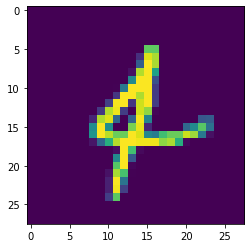

Predicted label:  7
Ground-truth label:  4


In [113]:
new_cnn = LeNet_1st()

new_cnn.load('bien-chung-lenet.h5')
pred = new_cnn.predict(x_test_norm)
index = 300
plt.imshow(x_test[index])
plt.show()
print('Predicted label: ', np.argmax(pred[index]))
print('Ground-truth label: ', y_test[index])

313/313 [==============================] - 1s 2ms/step


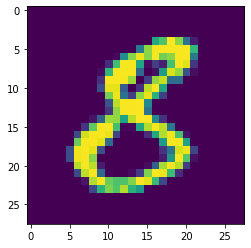

Predicted label:  8
Ground-truth label:  8


In [114]:
import matplotlib.pyplot as plt

pred = cnn.predict(x_test_norm)
test_index = 1234
plt.imshow(x_test[test_index])
plt.show()
print('Predicted label: ', np.argmax(pred[test_index]))
print('Ground-truth label: ', y_test[test_index])

313/313 [==============================] - 1s 2ms/step


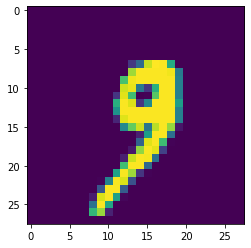

Predicted label:  7
Ground-truth label:  9


In [115]:
# Demo using a pretrained CNN model
cnn = LeNetCNN()
cnn.load('/content/bien-chung-lenet.h5')

pred = cnn.predict(x_test_norm)
plt.imshow(x_test[1000])
plt.show()
print('Predicted label: ', np.argmax(pred[1000]))
print('Ground-truth label: ', y_test[1000])

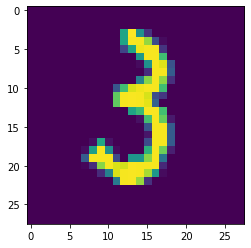

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [116]:
import matplotlib.pyplot as plt

# Visualize training data
plt.imshow(x_train[1234])
plt.show()
print('Label: ', y_train_oh[1234])

In [117]:
# Demo training a CNN model from scratch
cnn = LeNet_1st()
cnn.build((28, 28, 1))
cnn.train(x_train_norm, y_train_oh, x_test_norm, y_test_oh)
cnn.save('trained_model.h5')

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4207 - accuracy: 0.8771 - val_loss: 0.1876 - val_accuracy: 0.9421
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1669 - accuracy: 0.9501 - val_loss: 0.1419 - val_accuracy: 0.9546
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1358 - accuracy: 0.9585 - val_loss: 0.1065 - val_accuracy: 0.9664
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1173 - accuracy: 0.9643 - val_loss: 0.1030 - val_accuracy: 0.9679
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1071 - accuracy: 0.9669 - val_loss: 0.0922 - val_accuracy: 0.9703
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1011 - accuracy: 0.9684 - val_loss: 0.0913 - val_accuracy: 0.9713
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0923 - accuracy: 0.9720 - val_loss: 0.1018 - val_accuracy: 0.9682
Epoch 

In [75]:
pred_label = cnn.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


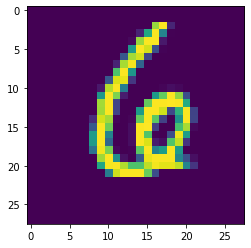

Predicted label:  6
Ground truth label:  6


In [76]:
plt.imshow(x_test[123])
plt.show()
print('Predicted label: ', np.argmax(pred_label[123]))
print('Ground truth label: ', y_test[123])

In [78]:
from keras.datasets import cifar10

cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16